Change the data source to Breast Cancer dataset and make the required changes.

In [1]:
#import packages/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Activation, Dense
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('/content/breastcancer.csv') #load dataset
dataset.head(1) #looking at dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [3]:
dataset['diagnosis'] = pd.factorize(dataset.diagnosis)[0] #converting categorical to numerical values for diagnosis
dataset.head(1) #looking at dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


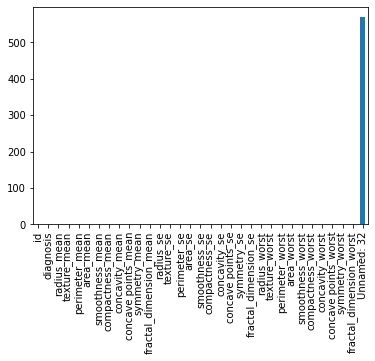

In [4]:
x = dataset.isnull().sum() #checking for null values
x.plot(kind='bar') #plotting the values

In [5]:
dataset = dataset.drop(['Unnamed: 32'], axis=1) #removing the column name 'unnamed: 32

In [6]:
len(dataset.columns) #looking at how many columns there are

32

In [7]:
dataset.iloc[:,2:32] #range of columns

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
dataset.iloc[:,1] #diagnosis column

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,2:32],dataset.iloc[:,1], test_size=0.33, random_state=1000) #traning my data
X_train.shape, y_train.shape #looking at the shape 

((381, 30), (381,))

In [20]:
my_first_nn = Sequential() #sequential model created
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) #added hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) #output layer

my_first_nn.compile(loss='binary_crossentropy', optimizer='adam')
my_first_nn_fitted = my_first_nn.fit(X_train, y_train, epochs=100, verbose=0,initial_epoch=0)
print(my_first_nn.summary())
print(round(my_first_nn.evaluate(X_test,y_test,verbose=0),3))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
0.262


Scalling dataset

In [11]:
y = np.array(dataset['diagnosis'].tolist()) #my target values
x = np.array(dataset) #features 
x

array([[8.4230200e+05, 0.0000000e+00, 1.7990000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 0.0000000e+00, 2.0570000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 0.0000000e+00, 1.9690000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 0.0000000e+00, 1.6600000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 0.0000000e+00, 2.0600000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 1.0000000e+00, 7.7600000e+00, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [12]:
sc = StandardScaler() #calling standard scaller 
X = sc.fit_transform(x) #fiiting the data


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1000) #passing in the scaled data
X_train.shape, y_train.shape #looking at the shape

((381, 32), (381,))

In [22]:
my_first_nn = Sequential() #sequential model created
my_first_nn.add(Dense(20, input_dim=32, activation='relu')) #added hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) #output layer
my_first_nn.add(Dense(1, activation='sigmoid')) #output layer
my_first_nn.add(Dense(1, activation='sigmoid')) #output layer

my_first_nn.compile(loss='binary_crossentropy', optimizer='adam')
my_first_nn_fitted = my_first_nn.fit(X_train, y_train, epochs=100, verbose=0,initial_epoch=0)
print(my_first_nn.summary())
print(round(my_first_nn.evaluate(X_test,y_test,verbose=0),3))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________
None
0.523
